# Breast Cancer Tumor Classification (Malignant or Benign)

We utilize an anonymized dataset of Breast Cancer tumor cell nucei data computed from fine needle aspirate (FMA) of breast mass. This data was originally provided by the University of Wisconsin and obtained here from the University of California: Irvine machine learning repository.
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
import pandas as pd
import numpy
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
breast_cancer_data_raw = pd.read_csv("BreastCancerDataset.csv")

In [3]:
breast_cancer_data_raw.head(10)

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


In [4]:
breast_cancer_data_raw.shape

(569, 32)

## Data Preprocessing

In [5]:
# Data Summary
breast_cancer_data_raw.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
breast_cancer_data_raw.columns

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [7]:
# Remove rows with "NaN" or no value in any field
breast_cancer_data_nonan = breast_cancer_data_raw.dropna()

In [8]:
len(breast_cancer_data_nonan)

569

In [9]:
# Check for duplicates
duplicates = breast_cancer_data_nonan[breast_cancer_data_nonan.duplicated()]

In [10]:
duplicates

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis


In [11]:
# Typecast all numbers to float or int
breast_cancer_data_tofloat = breast_cancer_data_nonan.apply(lambda col: pd.to_numeric(col, errors='ignore'))

/var/folders/2y/fjy4cptn0jb_d8mlggpd9rj00000gn/T/ipykernel_2120/1500849987.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  breast_cancer_data_tofloat = breast_cancer_data_nonan.apply(lambda col: pd.to_numeric(col, errors='ignore'))


In [12]:
# Manually enforce one-hot encoding for categorical target variable
breast_cancer_data_tofloat['Diagnosis'] = breast_cancer_data_tofloat['Diagnosis'].replace("M", 0)
breast_cancer_data_tofloat['Diagnosis'] = breast_cancer_data_tofloat['Diagnosis'].replace("B", 1)

/var/folders/2y/fjy4cptn0jb_d8mlggpd9rj00000gn/T/ipykernel_2120/595094664.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_cancer_data_tofloat['Diagnosis'] = breast_cancer_data_tofloat['Diagnosis'].replace("B", 1)


In [13]:
breast_cancer_data_prelimtrain = breast_cancer_data_tofloat.copy()

In [14]:
len(breast_cancer_data_prelimtrain)

569

## Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

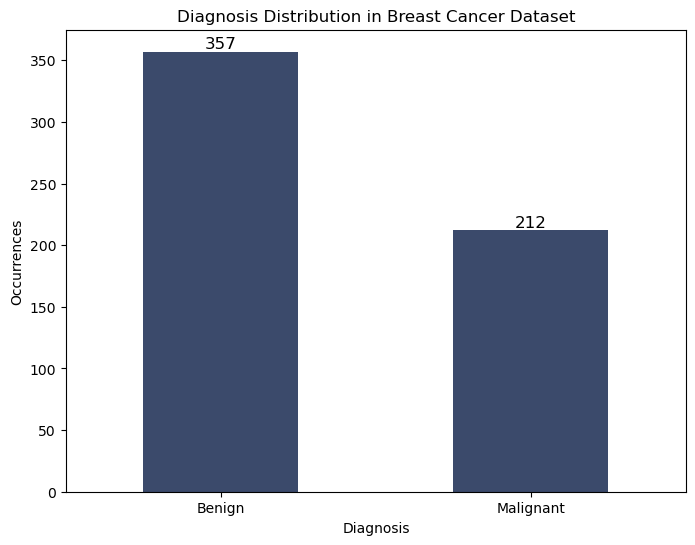

In [16]:
# Count occurrences of diagnosis (Malignant vs. Benign)
value_counts = breast_cancer_data_prelimtrain['Diagnosis'].value_counts()

custom_names = ['Benign', 'Malignant']

plt.figure(figsize=(8,6))
ax = value_counts.plot(kind='bar', color='#3b4a6b')

ax.set_xticklabels(custom_names)
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12, color='black')
    
plt.title('Diagnosis Distribution in Breast Cancer Dataset')
plt.xlabel('Diagnosis')
plt.ylabel('Occurrences')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Correlation Matrix
corr = breast_cancer_data_prelimtrain.corr()
corr

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
ID,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,-0.039769
radius1,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
texture1,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
perimeter1,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
area1,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
smoothness1,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
compactness1,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
concavity1,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
concave_points1,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
symmetry1,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499


## Model Testing and Accuracy

In [18]:
# Define features (X) and target (y)
X = breast_cancer_data_prelimtrain.drop(columns=['ID', 'Diagnosis'], axis = 1)  # Features
y = breast_cancer_data_prelimtrain['Diagnosis']  # Target variable

# Split into train (75%) and test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (426, 30)
Test Set Size: (143, 30)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.50%


In [20]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
result = pd.DataFrame([["Logistic Regression",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.31%


In [22]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
model_result = pd.DataFrame([["Decision Tree",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result = pd.concat([model_result,result], ignore_index=True)

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.20%


In [24]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
model_result = pd.DataFrame([["Random Forest",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result = pd.concat([model_result,result], ignore_index=True)

In [25]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.10%


In [26]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
model_result = pd.DataFrame([["Support Vector Machine",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result = pd.concat([model_result,result], ignore_index=True)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.50%


In [28]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
model_result = pd.DataFrame([["K Nearest Neighbors",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result = pd.concat([model_result,result], ignore_index=True)

In [29]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.80%


In [30]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
model_result = pd.DataFrame([["XGBoost",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result = pd.concat([model_result,result], ignore_index=True)

In [31]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.71%


In [32]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
f1 = f1_score(y_true=y_test,y_pred=y_pred)
prec = precision_score(y_true=y_test,y_pred=y_pred)
rec = recall_score(y_true=y_test,y_pred=y_pred)
model_result = pd.DataFrame([["MLP (Neural Network)",acc,f1,prec,rec]],columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result = pd.concat([model_result,result], ignore_index=True)

In [33]:
result

,Model,Accuracy,F1 score,Precision score,Recall score
0,MLP (Neural Network),0.937063,0.947368,0.987805,0.910112
1,XGBoost,0.958042,0.966292,0.966292,0.966292
2,K Nearest Neighbors,0.965035,0.972376,0.956522,0.988764
3,Support Vector Machine,0.951049,0.961749,0.936170,0.988764
4,Random Forest,0.972028,0.977778,0.967033,0.988764
5,Decision Tree,0.923077,0.936416,0.964286,0.910112
6,Logistic Regression,0.965035,0.972067,0.966667,0.977528


## Hyperparameter Tuning

Two highest performing models: 1. Random Forest 2. Logistic Regression

In [34]:
# Hyperparameter testing for random forest model
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9553990610328639


In [35]:
# Hyperparameter testing for logistic regression model
                        
logreg = LogisticRegression(max_iter=3000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          
    'solver': ['liblinear', 'lbfgs', 'saga'],    
    'penalty': ['l2', 'elasticnet'],     
    'max_iter': [100, 200, 300]                     
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.962435020519836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/